In [58]:
# Make an image gallery of all CMZoom continuum images

In [59]:
#import six
#from aplpy import FitsFigure
import aplpy

In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
#from matplotlib import *
import aplpy
from astropy.io import fits
import numpy as np
import re
from astropy.stats import mad_std
from astropy import units as u

from astropy.table import Table

In [64]:
#path='/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Continuum_no_pbcor/'
#temporary fix due to weird filenames!!!
#path='/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/CB_TEMPORARY/'
#path='/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Continuum_pbcor/'
#path='/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/CB_consistent_names_Continuum_pbcor/'
#Fixed to be in Jy/Sr
path='/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/MJy_Sr/CB_consistent_names_Continuum_pbcor/'

#path_mosaic='/Users/battersby/Dropbox/CMZoom_Data/Final_continuum_images/Final/Pb_corrected/'
path_mosaic='/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/Mosaics/Actual_final/'
figurepath='/Users/battersby/Dropbox/Work/cmz/cmzoom_overview/overleaf_cmzoom/10383815hfwsykpqhnrx/figures/'

In [65]:
from os import listdir
from os.path import isfile, join
filelist = [f for f in listdir(path) if isfile(join(path, f))]


In [66]:
print(filelist)

['G0.714-0.100.continuum.pbcor_MJy_Sr.fits', 'G0.340+0.055.continuum.pbcor_MJy_Sr.fits', 'G359.615-0.243.continuum.pbcor_MJy_Sr.fits', 'G0.326-0.085.continuum.pbcor_MJy_Sr.fits', 'G0.891-0.048.continuum.pbcor_MJy_Sr.fits', 'G1.085-0.027.continuum.pbcor_MJy_Sr.fits', 'G0.068-0.075.continuum.pbcor_MJy_Sr.fits', 'G0.145-0.086.continuum.pbcor_MJy_Sr.fits', 'G359.137+0.031.continuum.pbcor_MJy_Sr.fits', 'G1.683-0.089.continuum.pbcor_MJy_Sr.fits', 'G359.484-0.132.continuum.pbcor_MJy_Sr.fits', 'G0.699-0.028.continuum.pbcor_MJy_Sr.fits', 'G0.070-0.035.continuum.pbcor_MJy_Sr.fits', 'G0.619+0.012.continuum.pbcor_MJy_Sr.fits', 'G1.670-0.130.continuum.pbcor_MJy_Sr.fits', 'G0.316-0.201.continuum.pbcor_MJy_Sr.fits', 'G0.380+0.050.continuum.pbcor_MJy_Sr.fits', 'G359.611+0.018.continuum.pbcor_MJy_Sr.fits', 'G0.212-0.001.continuum.pbcor_MJy_Sr.fits', 'G1.038-0.074.continuum.pbcor_MJy_Sr.fits', 'G0.001-0.058.continuum.pbcor_MJy_Sr.fits', 'G359.648-0.133.continuum.pbcor_MJy_Sr.fits', 'G0.054+0.027.continu

In [67]:
f=filelist[4]
coords=[float(s) for s in re.findall(r'-?\d+\.?\d*', f)]
negative = [s for s in re.findall(r'\-', str(coords[1]))]
if negative == ['-']:
    print('True')
    obj_name = 'G'+str(coords[0])+str(coords[1])
else:
    print('False')
    obj_name = 'G'+str(coords[0])+'+'+str(coords[1])
#negative=
print(coords, obj_name)
print(negative)

True
[0.891, -0.048] G0.891-0.048
['-']


In [85]:
print(figurepath)

/Users/battersby/Dropbox/Work/cmz/cmzoom_overview/overleaf_cmzoom/10383815hfwsykpqhnrx/figures/


<IPython.core.display.Javascript object>


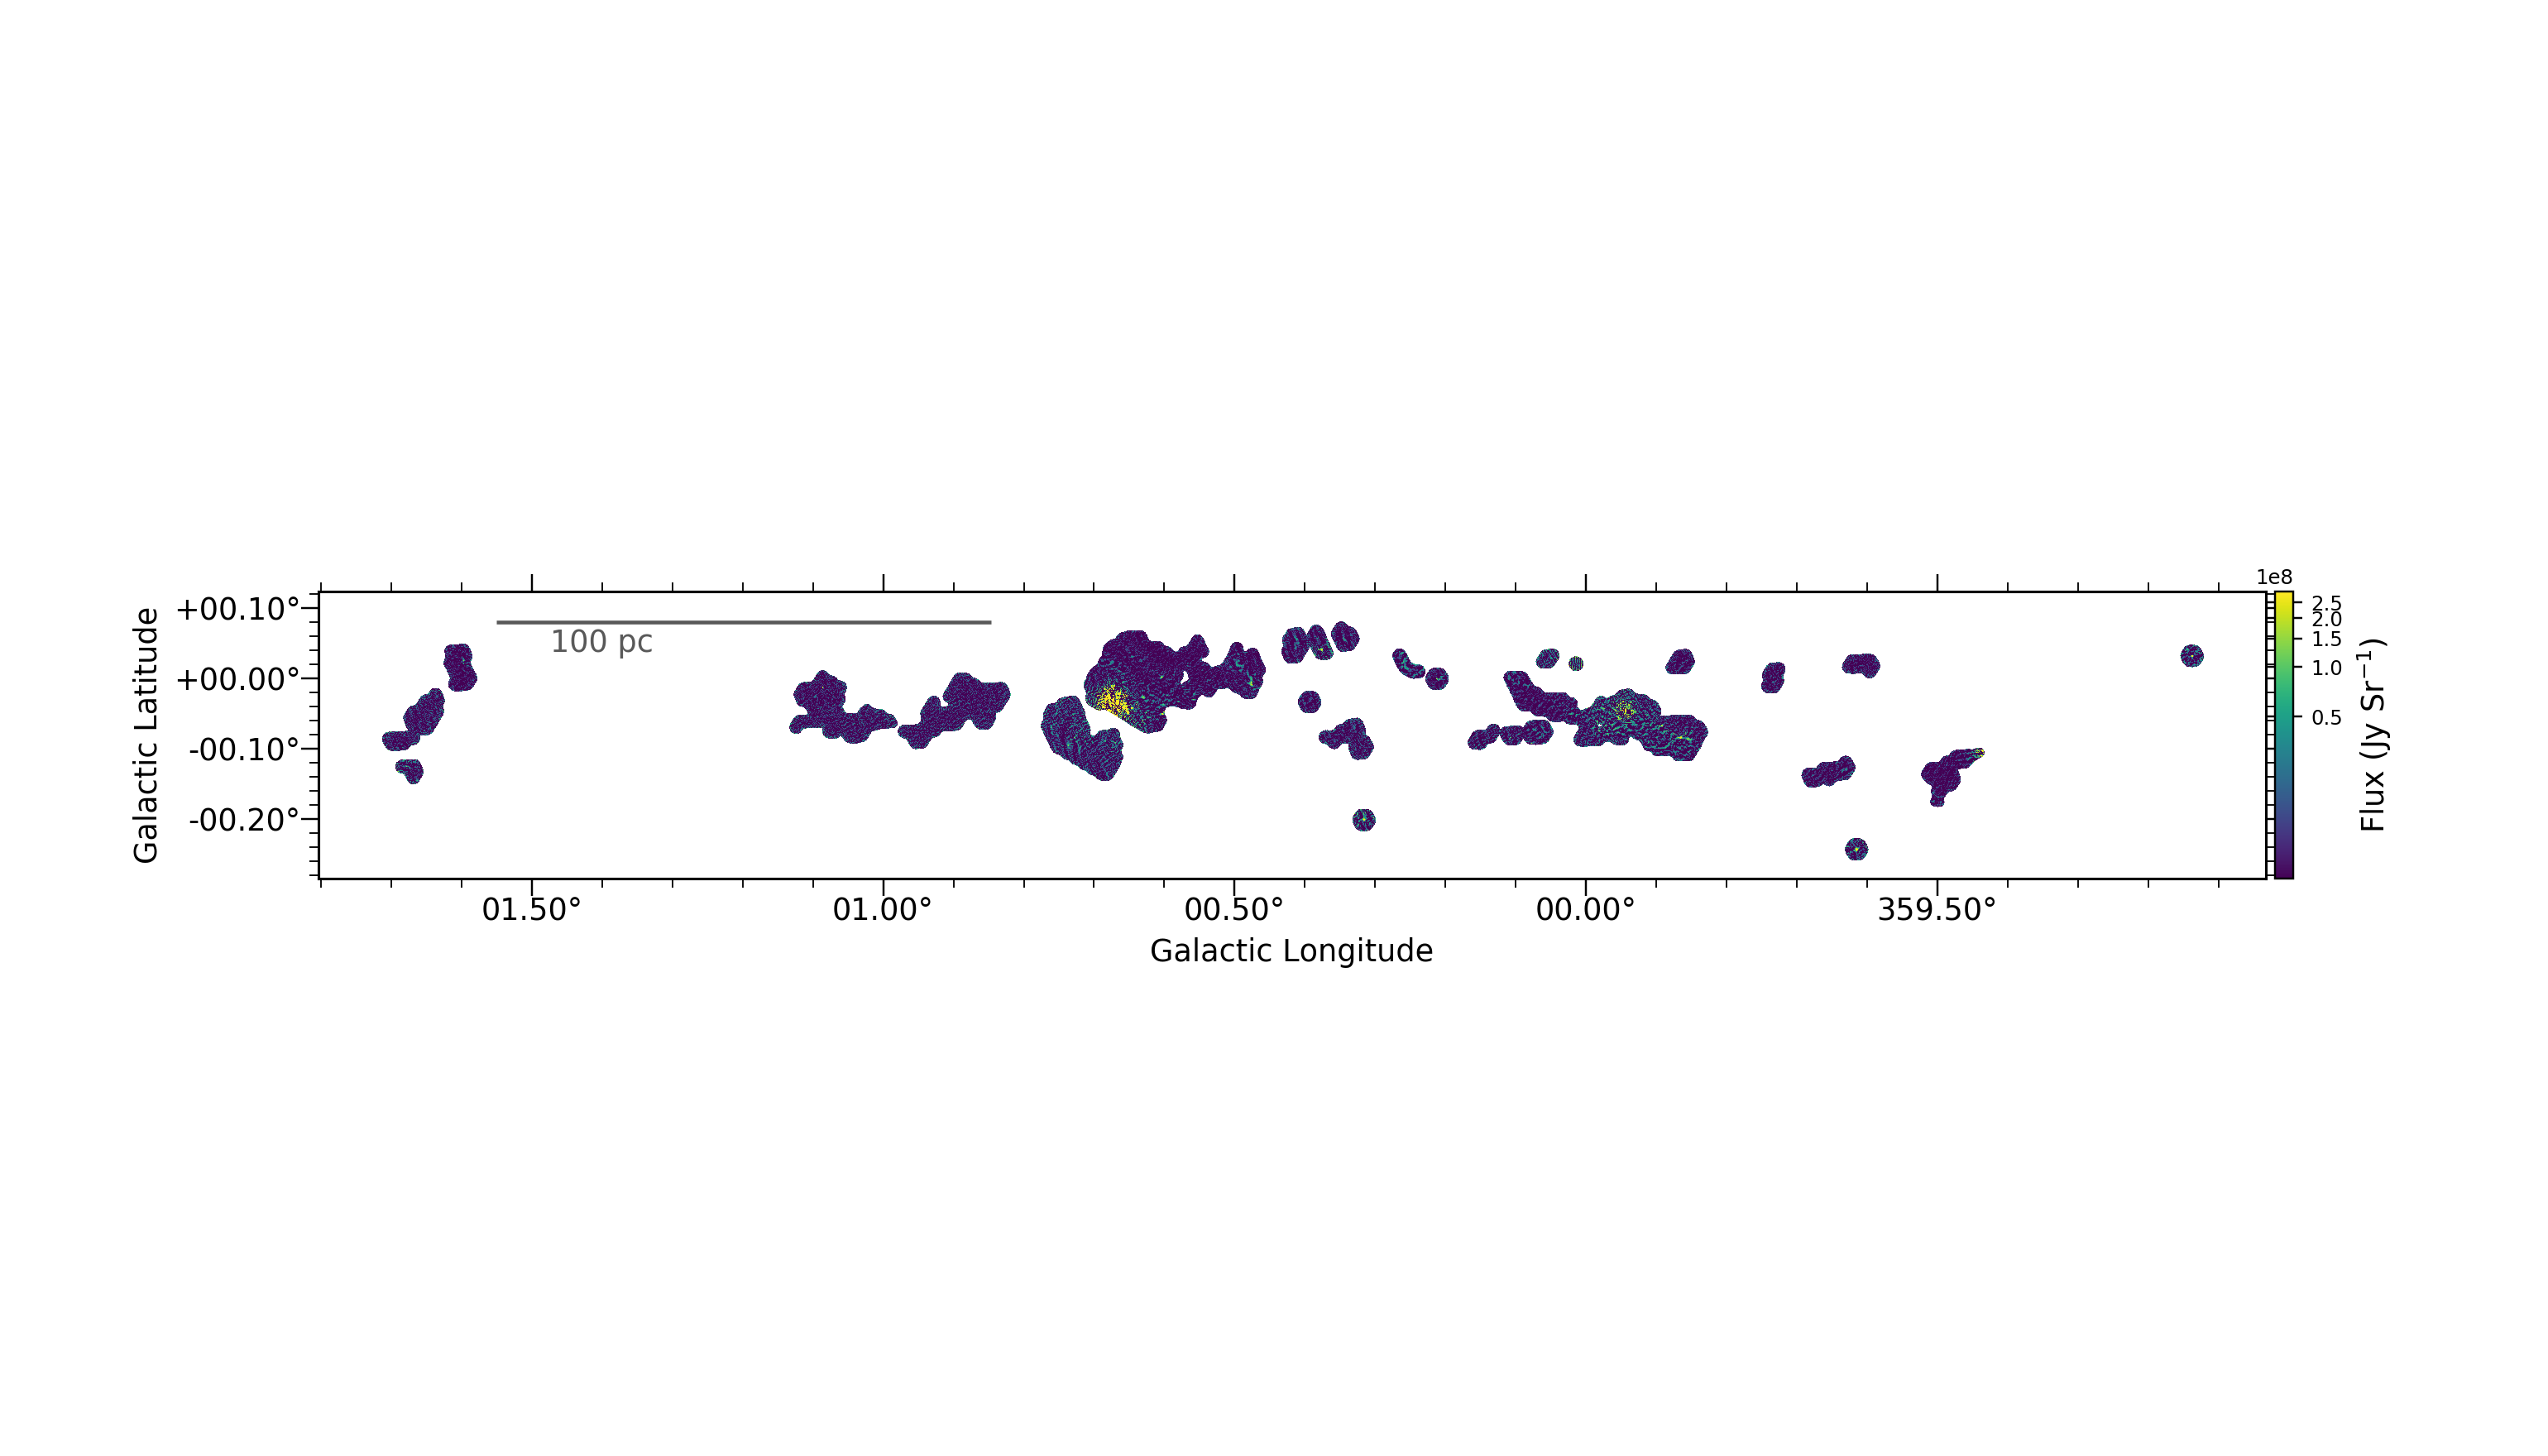

/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tick.tick2On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:140: MatplotlibDeprecationWarning: 
The label1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.label1.set_visible instead.
  tick.label1On = F

INFO: Auto-setting resolution to 300 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


In [87]:
##Make full mosaic:
%matplotlib nbagg
plt.rcParams.update({'font.size': 12})

#hdulist = fits.open(path_mosaic+'Continuum_mosaic_current.fits')
#hdulist = fits.open(path_mosaic+'CMZoom_continuum_no_pbcor_mosaic.fits')
#hdulist = fits.open(path_mosaic+'CMZoom_continuum_mosaic_no_SgrA.fits')
hdulist = fits.open(path_mosaic+'CMZoom_continuum_pbcor.fits')
data=hdulist[0].data
hdr=hdulist[0].header

lsize=hdr['NAXIS1']*np.abs(hdr['CDELT1'])
bsize=hdr['NAXIS2']*np.abs(hdr['CDELT2'])
    
#Determine Central coordinates from FITS header
# named coordiantes are not the central positions :()
lon=np.arange(hdr['NAXIS1'])
lat=np.arange(hdr['NAXIS2'])
lon=(lon-hdr['CRPIX1'])*hdr['CDELT1']+hdr['CRVAL1']
lon=(360.0+lon)
loncen=((np.max(lon)-np.min(lon))/2.0)+np.min(lon)
lat=(lat-hdr['CRPIX2'])*hdr['CDELT2']+hdr['CRVAL2']
latcen=((np.max(lat)-np.min(lat))/2.0)+np.min(lat)
    
# Get Median Average Deviation, use as a proxy for RMS..... ?!
#q=data[~np.isnan(data)]
#madval=mad_std(q)
#print(madval)
### er, or use the RMS 12/19/19 XXXX do this.

#Plot figure
fig = plt.figure(1, figsize=(14,8))
#fig, ax = plt.subplots()
fig.clf()
#plt.gcf().subplots_adjust(bottom=-0.2) # make room for x-axis

f1 = aplpy.FITSFigure(hdulist, 0, figure=fig, convention='wells')#, subplot=(2,1,1))#[0.2,0.5,0.9,0.5])
f1.recenter(loncen, latcen, width=lsize*1.05, height=bsize*1.05)
#f1.show_colorscale(cmap='viridis', vmin=0.56e6, vmax=14e6, stretch='arcsinh')
#f1.show_colorscale(cmap='viridis', pmin=0.55, pmax=99.95, stretch='arcsinh')
f1.show_colorscale(cmap='viridis', vmin=2e6, vmax=2.9e8, stretch='arcsinh')

##ACK scales don't match :( ask perry I guess 
# approximate conversion, MJy/Sr * 0.28 = mJy/beam
# individual ones scaled from 0.002 to 0.05 Jy/beam = 2-50 mJy/beam Would be --> 0.56 - 14 Jy/Sr
# large mosaic (2e6-3e8): 0.56-84  mJy/beam 


f1.show_colorbar()
f1.set_nan_color('white')
f1.colorbar.set_width(0.1)
f1.colorbar.set_axis_label_text('Flux (Jy Sr$^{-1}$)')
f1.colorbar.set_font(size=8)
#f1.colorbar.set_ticks('2e6', '1e7', '5e7', '1e8', '3e8')
#cbar = fig.colorbar(ax, ticks=[2e6, 1e7, 5e7, 1e8, 3e8])
#cbar.ax.set_yticklabels(['2e6', '1e7', '5e7', '1e8', '3e8'])
#cbar.set_axis_label_text('Flux (Jy Sr$^{-1}$)')
#cbar.set_width(0.1)
#cbar.set_font(size=8)

f1.set_tick_labels_format(xformat='ddd.dd', yformat='dd.dd')
f1.ticks.set_color('black')

##XX 12/19/19: fix tick labels so they don't run into each other.
##Think i need to remake outside of aplypy fitsfigure??

# set_corner broken in current version of aplpy, woe is me! Just do a simple line and label
#f1.add_scalebar(100.0*degper1pc*u.degree)
#f1.scalebar.set_corner('bottom left') #OMG THIS BROKE? Leaving it out for now, so frustrating. 
#f1.scalebar.set_label('100 pc')
# INSTEAD DO A LINE AND LABEL
gcdist = 8.15e3 #pc Updated from gravity2018 and Reid2019
dgper1pc = (1.0/gcdist)*(360.0/(2.0*np.pi))
dgper100pc = dgper1pc*100.0
scalebar100pc = np.array([[1.55,(1.55-dgper100pc)],[0.08,0.08]])
f1.show_lines([scalebar100pc], color='black', alpha=0.65)
f1.add_label(1.4, 0.05, '100 pc', color='black', alpha=0.65)
   
outfile='CMZoom_continuum_mosaic.pdf'
figurepath2='/Users/battersby/Dropbox/Work/cmz/cmzoom_overview/overleaf_cmzoom/not_used_other_versions_of_overleaf_things/other_figure_versions/'

f1.save(figurepath2+outfile)


In [69]:
# Import noise map
# Data path
pathrms='/Users/battersby/Dropbox/CMZoom_Data/'
#CMZoom noise map
sma_noise_fits=fits.open(pathrms+'final_catalog/high_reliability/CMZoom_noisemap_JySr_k14_final.fits')
sma_noise=sma_noise_fits[0].data

In [70]:
print(path)

/Users/battersby/Dropbox/CMZoom_Data/continuum_images/Final_continuum_images/MJy_Sr/CB_consistent_names_Continuum_pbcor/


In [73]:
print(filelist)

['G0.714-0.100.continuum.pbcor_MJy_Sr.fits', 'G0.340+0.055.continuum.pbcor_MJy_Sr.fits', 'G359.615-0.243.continuum.pbcor_MJy_Sr.fits', 'G0.326-0.085.continuum.pbcor_MJy_Sr.fits', 'G0.891-0.048.continuum.pbcor_MJy_Sr.fits', 'G1.085-0.027.continuum.pbcor_MJy_Sr.fits', 'G0.068-0.075.continuum.pbcor_MJy_Sr.fits', 'G0.145-0.086.continuum.pbcor_MJy_Sr.fits', 'G359.137+0.031.continuum.pbcor_MJy_Sr.fits', 'G1.683-0.089.continuum.pbcor_MJy_Sr.fits', 'G359.484-0.132.continuum.pbcor_MJy_Sr.fits', 'G0.699-0.028.continuum.pbcor_MJy_Sr.fits', 'G0.070-0.035.continuum.pbcor_MJy_Sr.fits', 'G0.619+0.012.continuum.pbcor_MJy_Sr.fits', 'G1.670-0.130.continuum.pbcor_MJy_Sr.fits', 'G0.316-0.201.continuum.pbcor_MJy_Sr.fits', 'G0.380+0.050.continuum.pbcor_MJy_Sr.fits', 'G359.611+0.018.continuum.pbcor_MJy_Sr.fits', 'G0.212-0.001.continuum.pbcor_MJy_Sr.fits', 'G1.038-0.074.continuum.pbcor_MJy_Sr.fits', 'G0.001-0.058.continuum.pbcor_MJy_Sr.fits', 'G359.648-0.133.continuum.pbcor_MJy_Sr.fits', 'G0.054+0.027.continu

G0.714-0.100.continuum.pbcor_MJy_Sr.fits


<IPython.core.display.Javascript object>


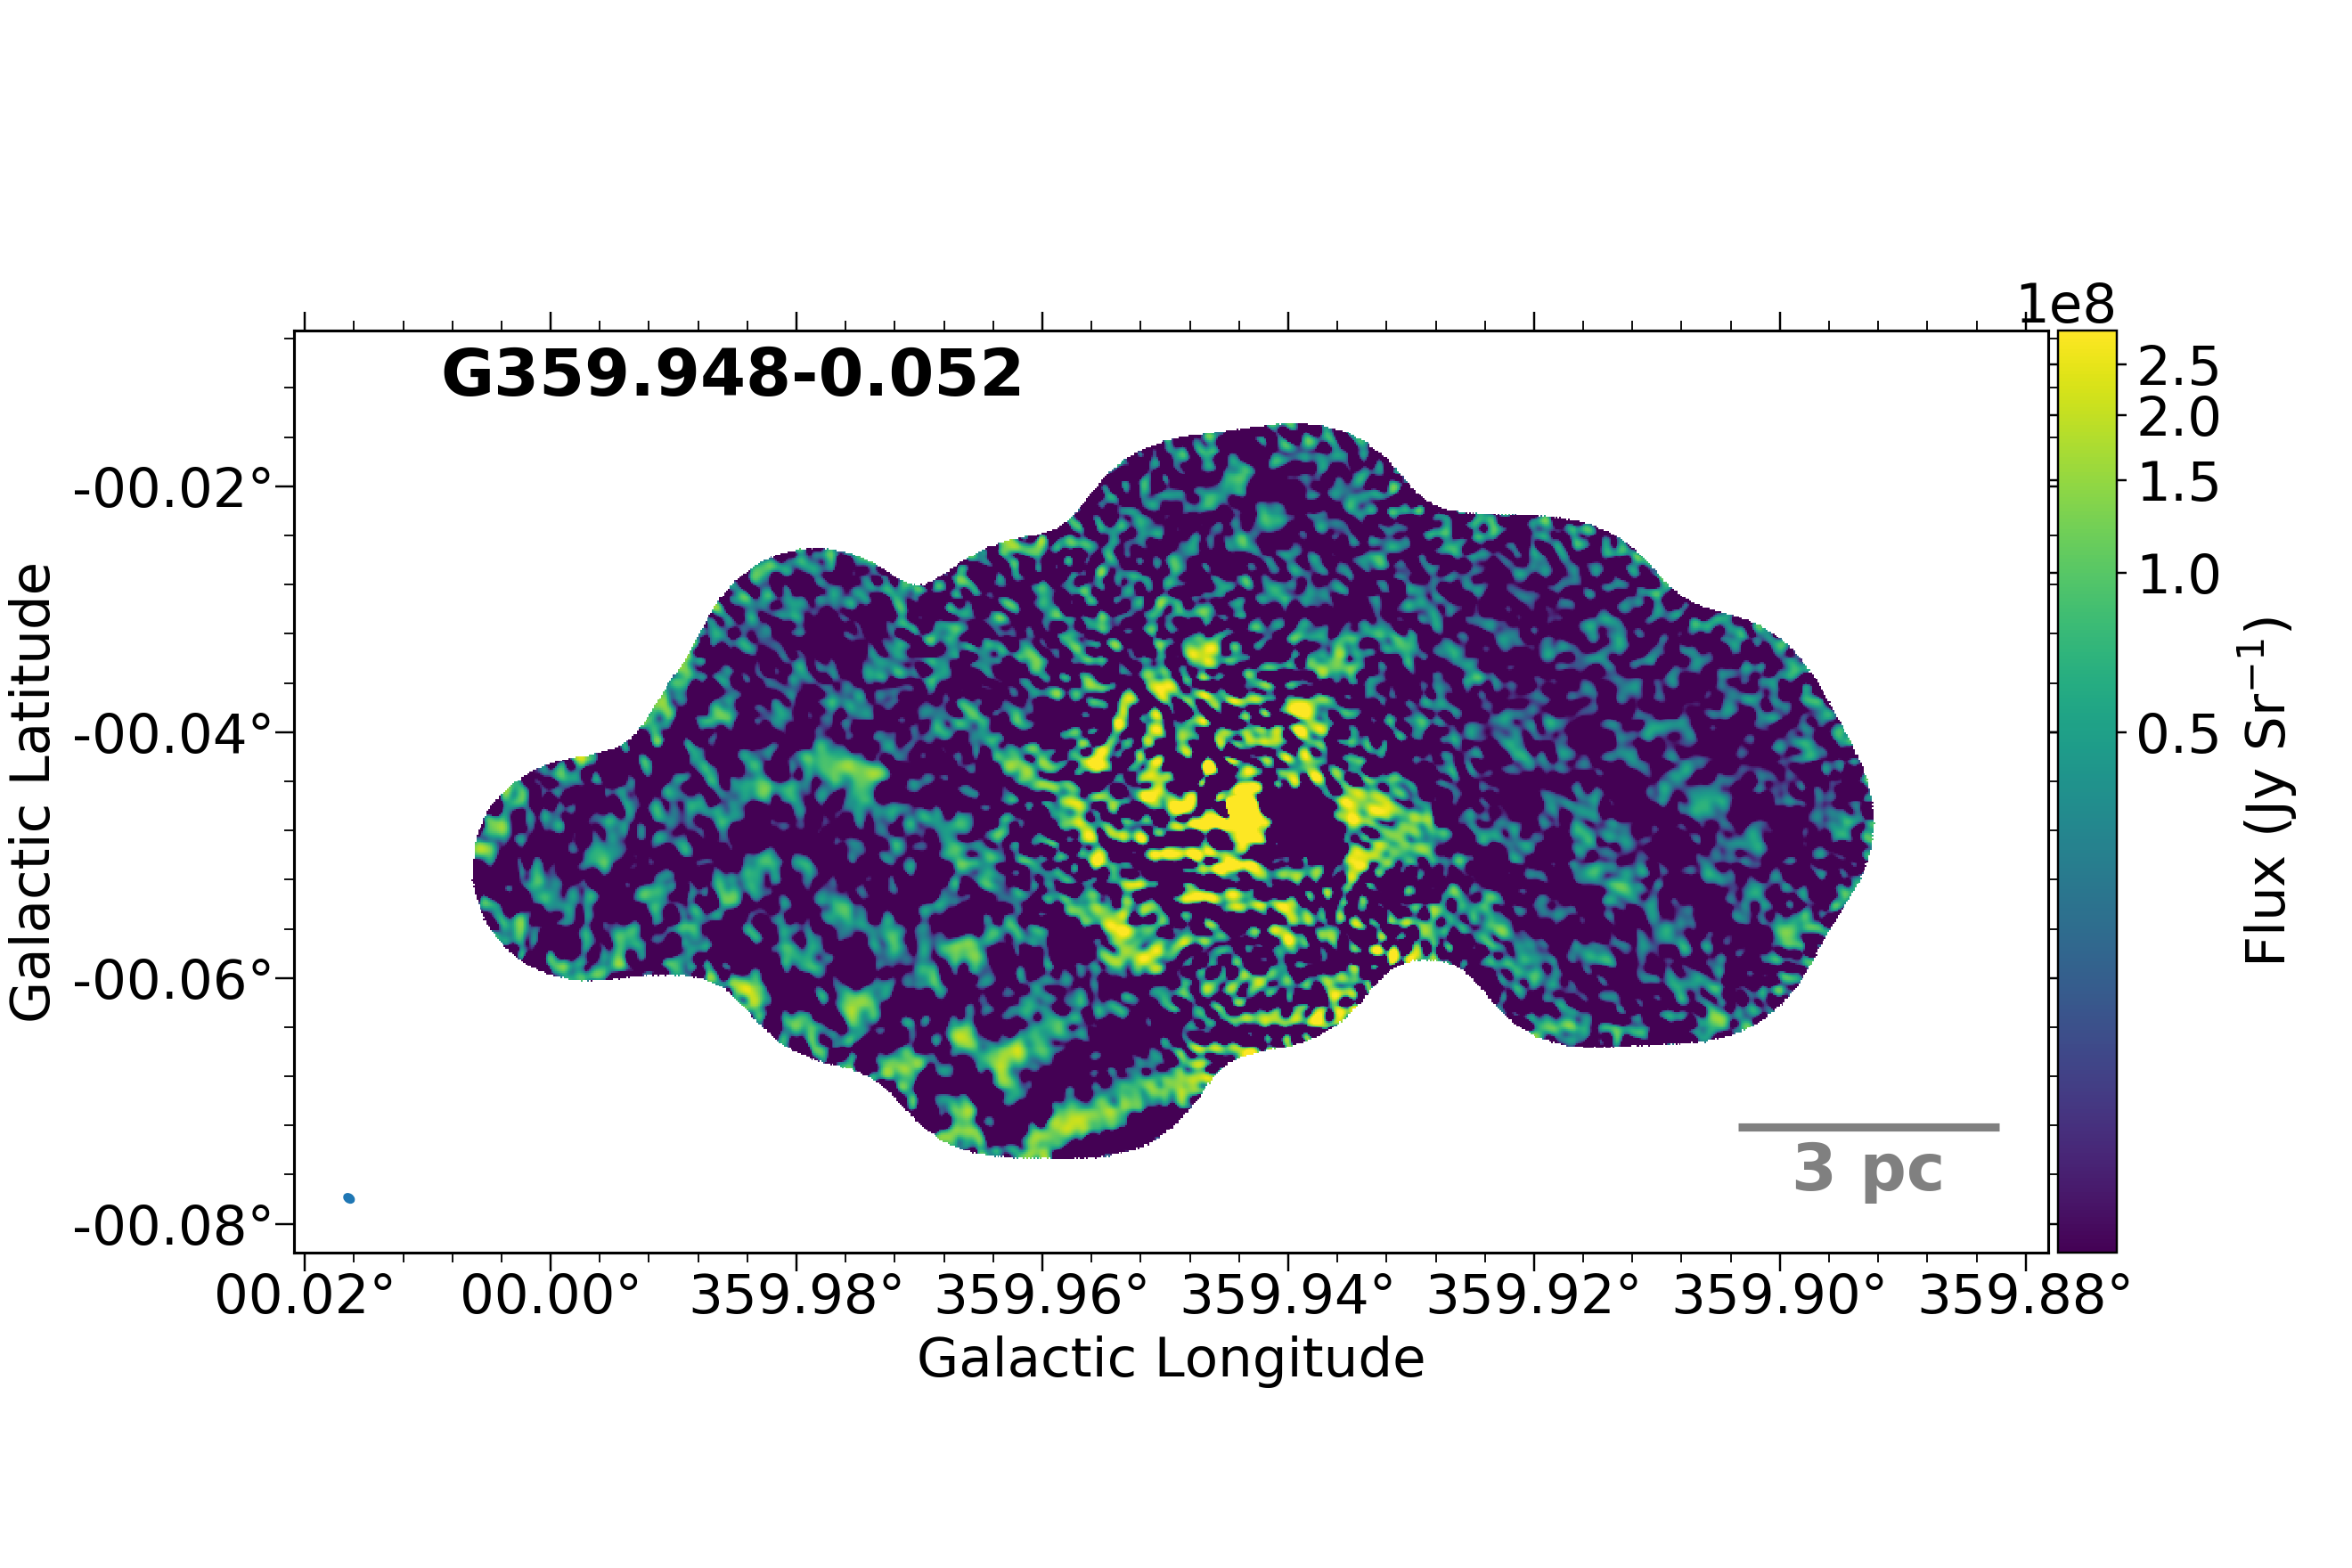

Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tick.tick2On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:140: MatplotlibDeprecationWarning: 
The label1On function wa

INFO: Auto-setting resolution to 177.151 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.340+0.055.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 63.7175 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.615-0.243.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 47.4838 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.326-0.085.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 87.8653 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.891-0.048.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 161.872 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.085-0.027.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 98.6201 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.068-0.075.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 53.3685 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.145-0.086.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 54.586 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.137+0.031.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 47.2808 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.683-0.089.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 55.1676 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.484-0.132.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 123.782 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.699-0.028.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 139.205 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.070-0.035.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 107.143 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.619+0.012.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 212.256 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.670-0.130.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 52.7597 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.316-0.201.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 47.4838 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.380+0.050.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 74.2695 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.611+0.018.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 55.0279 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.212-0.001.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 47.4838 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.038-0.074.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 155.168 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.001-0.058.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 95.2514 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.648-0.133.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 77.514 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.054+0.027.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 42.8166 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.393-0.034.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 47.2808 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.651-0.050.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 99.8377 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.412+0.052.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 76.9075 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.106-0.082.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 42.2078 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.865+0.022.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 53.9773 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.734+0.002.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 65.9497 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.014+0.021.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 31.4529 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.489+0.010.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 119.115 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.602+0.018.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 99.6347 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.889-0.093.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 130.447 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G0.253+0.016.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 62.9058 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G359.948-0.052.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    19.947177 from OBSGEO-[XYZ].
Set OBSGEO-H to     6578.484 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 114.804 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


In [88]:
### This makes individual continuum images for each region in a uniform way
# Works for all except G1.602, G1.651, and G0.412 ... run the next cell to remake those 
# in a way that works better.

%matplotlib nbagg
plt.rcParams.update({'font.size': 20})
#i=0
cloudnames=[]
for f in filelist: 
#while i < 1:   
#    f=filelist[i]
    print(f)
    hdulist = fits.open(path+f)
    data=hdulist[0].data
    hdr=hdulist[0].header
    
    #Find the central coordinates and object name based on file name
    coords=[float(s) for s in re.findall(r'-?\d+\.?\d*', f)]
#    obj_name = 'G'+str(coords[0])+str(coords[1])
    negative = [s for s in re.findall(r'\-', str(coords[1]))]
    if negative == ['-']:
        obj_name = 'G'+str(coords[0])+str(coords[1])
        cloudnames.append(obj_name)
    else:
        obj_name = 'G'+str(coords[0])+'+'+str(coords[1])
        cloudnames.append(obj_name)
    
    #Find the image size from the FITS header
    lsize=hdr['NAXIS1']*np.abs(hdr['CDELT1'])
    bsize=hdr['NAXIS2']*np.abs(hdr['CDELT2'])
    
    #Determine Central coordinates from FITS header
    # named coordiantes are not the central positions :()
    lon=np.arange(hdr['NAXIS1'])
    lat=np.arange(hdr['NAXIS2'])
    lon=(lon-hdr['CRPIX1'])*hdr['CDELT1']+hdr['CRVAL1']
    lon=(360.0+lon)
    loncen=((np.max(lon)-np.min(lon))/2.0)+np.min(lon)
    lat=(lat-hdr['CRPIX2'])*hdr['CDELT2']+hdr['CRVAL2']
    latcen=((np.max(lat)-np.min(lat))/2.0)+np.min(lat)
 
    fig = plt.figure(1, figsize=(12,8))
    fig.clf()
    #plt.gcf().subplots_adjust(bottom=-0.2) # make room for x-axis

    f1 = aplpy.FITSFigure(hdulist, 0, figure=fig, font=16)#, subplot=(2,1,1))#[0.2,0.5,0.9,0.5])
    #f1.recenter(loncen, latcen, width=lsize*1.15, height=bsize*1.15)
    f1.recenter(loncen, latcen, width=lsize*1.25, height=bsize*1.25) # expand each map by a bit to allow for scale bar...
    f1.set_tick_labels_format(xformat='d.dd', yformat='d.dd')
    #f1.show_colorscale(cmap='viridis', pmin=0.25, pmax=99.95, stretch='arcsinh')
    #f1.show_colorscale(cmap='viridis', vmin=0.002, vmax=0.05, stretch='arcsinh') #this was for Jy/beam
    f1.show_colorscale(cmap='viridis', vmin=2e6, vmax=2.9e8, stretch='arcsinh') # for Jy/Sr to match 
    f1.show_colorbar()
    f1.set_nan_color('white')
    f1.colorbar.set_width(0.3)
    f1.colorbar.set_axis_label_text('Flux (Jy Sr$^{-1}$)')# (Jy Sr$^{-1}$)')
#    f1.colorbar.set_font(size=16)
    f1.add_beam()

    ### PLOT RMS contours on the images
    # Get Median Average Deviation, use as a proxy for RMS..... ?!
    #q=data[~np.isnan(data)]
    #madval=mad_std(q)
    # Use actual RMS map now instead!
    # ooh, or instead just use survey average RMS?? 3.6 mJy/beam
    #madval=3.6e-3
    #DERP SKIP CONTOURS FOR NOW TIL RMS STUFF IS HAPPY.
    # Uniform RMS just picks up noise edges
    # Really would want to do full mosaic map / noise map and do a sigma cut
    # but this would align really poorly with the way that this script currently works :( :( 
#    f1.show_contour(hdulist,0, levels=[5.0*madval], 
#                    colors='white', width=3) 
#    f1.show_contour(hdulist,0, levels=[10.0*madval], 
#                    colors='black', width=3)#, smooth=3, kernel='gauss') 

    f1.add_label(0.25, 0.95, obj_name, relative=True, 
                 color='black', size=24,weight='bold') 
    
    f1.ticks.set_color('black')
    
    #Add scalebar of 3 pc. First calculate the size in degrees of 1 pc
    #gcdist=8.34e3 #pc
    gcdist=8.1e3 #pc Updated from gravity2018 and Reid2019
    degper1pc=(1.0/gcdist)*(360.0/(2.0*np.pi))
    f1.add_scalebar(3.0*degper1pc*u.degree, linewidth=3, color='gray', fontsize=24, fontweight='bold')
    # set_corner broken in current version of aplpy, woe is me! 
    #f1.scalebar.set_corner('bottom right')
    f1.scalebar.set_label('3 pc')
    
    #replace first two "." with "_" so that overleaf will allow me to git push the files
    overleaf_name=obj_name.replace(".", "_", 2)
    #outfile=obj_name+'_continuum_cutout.pdf'
    outfile=overleaf_name+'_continuum_cutout.pdf'
    f1.save(figurepath+'continuum_images_appendix/'+outfile)
#    i=i+1
    


G0.412+0.052.continuum.pbcor_MJy_Sr.fits


<IPython.core.display.Javascript object>


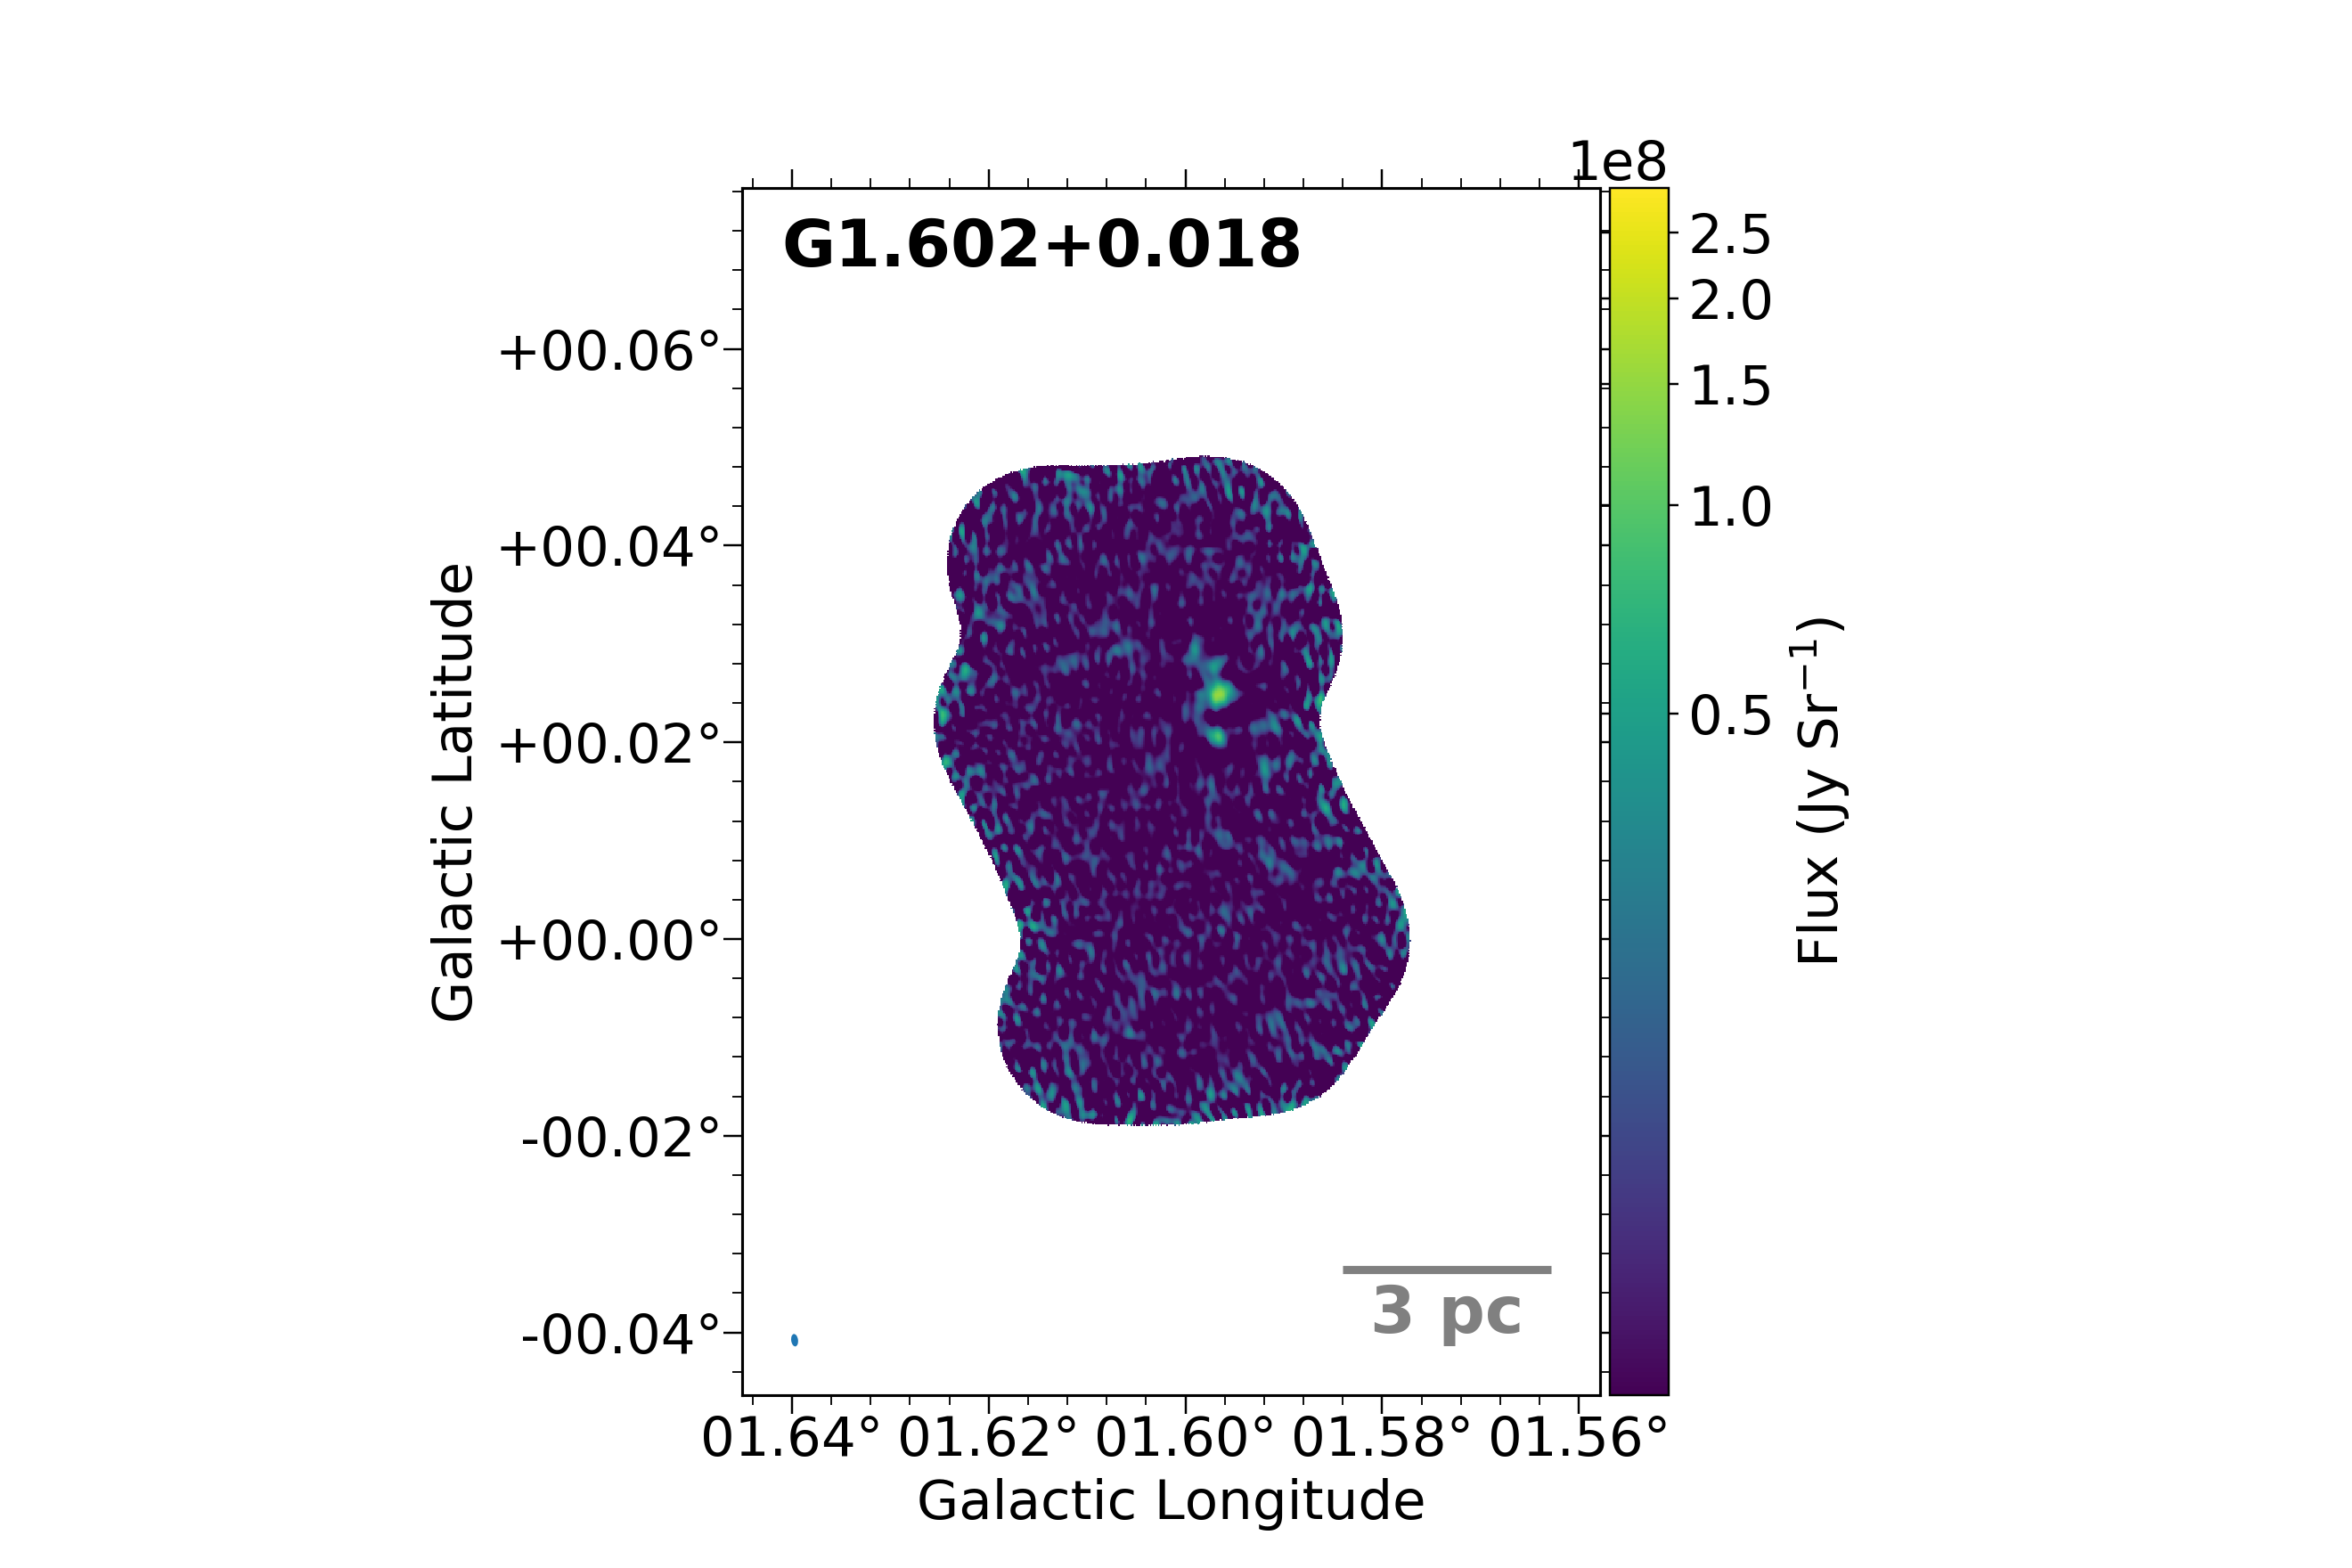

Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
  tick.tick2On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:140: MatplotlibDeprecationWarning: 
The label1On function wa

INFO: Auto-setting resolution to 110.747 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.651-0.050.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 143.766 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


G1.602+0.018.continuum.pbcor_MJy_Sr.fits


Set OBSGEO-B to    -2.059986 from OBSGEO-[XYZ].
Set OBSGEO-H to -6374293.888 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:164: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:138: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
  tick.tick1On = True
/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/colorbar.py:139: MatplotlibDeprecationWarning: 
The tick2On function was depreca

INFO: Auto-setting resolution to 143.474 dpi [aplpy.core]


/Users/battersby/anaconda3/lib/python3.6/site-packages/aplpy/normalize.py:92: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(value):


In [89]:
# Special window to make figures for G1.602 and G1.651 and G0.412 bc they have special needs.
%matplotlib nbagg
plt.rcParams.update({'font.size': 20})
cloudnames=[]
filelist2=['G0.412+0.052.continuum.pbcor_MJy_Sr.fits', 'G1.651-0.050.continuum.pbcor_MJy_Sr.fits', 
           'G1.602+0.018.continuum.pbcor_MJy_Sr.fits']
for f in filelist2: 
    print(f)
    hdulist = fits.open(path+f)
    data=hdulist[0].data
    hdr=hdulist[0].header
    
    #Find the central coordinates and object name based on file name
    coords=[float(s) for s in re.findall(r'-?\d+\.?\d*', f)]
    negative = [s for s in re.findall(r'\-', str(coords[1]))]
    if negative == ['-']:
        obj_name = 'G'+str(coords[0])+str(coords[1])
        cloudnames.append(obj_name)
    else:
        obj_name = 'G'+str(coords[0])+'+'+str(coords[1])
        cloudnames.append(obj_name)
    
    #Find the image size from the FITS header
    lsize=hdr['NAXIS1']*np.abs(hdr['CDELT1'])
    bsize=hdr['NAXIS2']*np.abs(hdr['CDELT2'])
    
    #Determine Central coordinates from FITS header
    # named coordiantes are not the central positions :()
    lon=np.arange(hdr['NAXIS1'])
    lat=np.arange(hdr['NAXIS2'])
    lon=(lon-hdr['CRPIX1'])*hdr['CDELT1']+hdr['CRVAL1']
    lon=(360.0+lon)
    loncen=((np.max(lon)-np.min(lon))/2.0)+np.min(lon)
    lat=(lat-hdr['CRPIX2'])*hdr['CDELT2']+hdr['CRVAL2']
    latcen=((np.max(lat)-np.min(lat))/2.0)+np.min(lat)
 
    fig = plt.figure(1, figsize=(12,8))
    fig.clf()
    #plt.gcf().subplots_adjust(bottom=-0.2) # make room for x-axis

    f1 = aplpy.FITSFigure(hdulist, 0, figure=fig, font=16)#, subplot=(2,1,1))#[0.2,0.5,0.9,0.5])
    f1.recenter(loncen, latcen, width=lsize*1.8, height=bsize*1.8) # expand each map by a bit to allow for scale bar...
    f1.set_tick_labels_format(xformat='d.dd', yformat='d.dd')
    f1.show_colorscale(cmap='viridis', vmin=2e6, vmax=2.9e8, stretch='arcsinh') # for Jy/Sr to match 
    f1.show_colorbar()
    f1.set_nan_color('white')
    f1.colorbar.set_width(0.3)
    f1.colorbar.set_axis_label_text('Flux (Jy Sr$^{-1}$)')# (Jy Sr$^{-1}$)')
    f1.add_beam()

    f1.add_label(0.35, 0.95, obj_name, relative=True, 
                 color='black', size=24,weight='bold') 
    
    f1.ticks.set_color('black')
    
    #Add scalebar of 3 pc. First calculate the size in degrees of 1 pc
    gcdist=8.1e3 #pc Updated from gravity2018 and Reid2019
    degper1pc=(1.0/gcdist)*(360.0/(2.0*np.pi))
    f1.add_scalebar(3.0*degper1pc*u.degree, linewidth=3, color='gray', fontsize=24, fontweight='bold')
    # set_corner broken in current version of aplpy, woe is me! 
    #f1.scalebar.set_corner('bottom right')
    f1.scalebar.set_label('3 pc')
    
    #replace first two "." with "_" so that overleaf will allow me to git push the files
    overleaf_name=obj_name.replace(".", "_", 2)
    outfile=overleaf_name+'_continuum_cutout.pdf'
    f1.save(figurepath+'continuum_images_appendix/'+outfile)
    


In [ ]:
print(cloudnames)

In [ ]:
### Don't think I currently use anything below this cell....
###
### 12/19/19

In [ ]:
#Read in dense gas fraction table and make edits

In [ ]:
dgfpath='/Users/battersby/Dropbox/CMZoom_Data/dense_gas_fraction/'

t = Table.read(
    dgfpath+'DenseGasFrac_table.fits')#, format='ascii.ipac')

In [ ]:
t


In [ ]:
b=[]
for i in t['Mean $l$']:
    if i > 350:
        b.append(i-360)
    else: 
        b.append(i)
print(b)

t['Mean $l$'] = b


In [ ]:
t

In [ ]:
t.write(dgfpath+'DenseGasFrac_table_negativel.fits', format='fits')

In [ ]:
tflux =  Table.read(dgfpath+'SMA_Flux_Fraction.txt', format='ascii')

In [ ]:
tflux

In [ ]:
c=[]
for i in tflux['Mean longitude']:
    if i > 350:
        c.append(i-360)
    else: 
        c.append(i)
print(c)

tflux['Mean longitude'] = c

In [ ]:
tflux.write(dgfpath+'SMA_Flux_Fraction_negativel.fits', format='fits')
#tflux =  Table.read(dgfpath+'SMA_Flux_Fraction.txt', format='ascii')

In [ ]:
####BACKUP

%matplotlib nbagg

for f in filelist: 
    print(f)
    hdulist = fits.open(path+f)
    data=hdulist[0].data
    coords=[float(s) for s in re.findall(r'-?\d+\.?\d*', f)]
    
    fig = plt.figure(1, figsize=(12,8))
    fig.clf()
    #plt.gcf().subplots_adjust(bottom=-0.2) # make room for x-axis

    f1 = aplpy.FITSFigure(hdulist, 0, figure=fig)#, subplot=(2,1,1))#[0.2,0.5,0.9,0.5])
    f1.recenter(coords[0], coords[1], width=0.2, height=0.2)
    f1.show_colorscale(cmap='viridis', vmin=np.nanmin(data), vmid=data.median, vmax=0.9*np.nanmax(data), stretch='log')
    f1.show_colorbar()
    #f1.set_nan_color('0.85')
    f1.set_nan_color('white')
    f1.colorbar.set_width(0.3)
    #f1.show_contour(columnlist,0, levels=[1e+22,5e+22,1e+23], 
    #                colors='0.75',
                #colors=['orange','brown','white'],
                #colors=[(0.33,0.667,1)]*10 + [color + (alpha,) for alpha in np.linspace(1,2)],
    #                smooth=3, kernel='gauss')
    #f1.add_label(358.9, 0.50, 'Column Density N(H$_2$) [cm$^{-2}$]', 
    #             color='black', size=16,weight='bold')
    #f1.set_tick_labels_format(xformat='ddd.d', yformat='dd.d')
    #f1.ticks.set_color('black')
    #f1.add_scalebar(0.674*u.degree)
    #f1.scalebar.set_corner('top left')
    #f1.scalebar.set_label('100 pc')

    f1.save('/Users/battersby/Google Drive/test_cmzoom.pdf')
    
